In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('path_to_your_dataset.csv.csv')

In [9]:
df.head()

,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",87%,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",82%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",48%,Rx,D,N,NaN,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html
3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",NaN,41%,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623.0,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html
4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",39%,Rx,B,N,NaN,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html


In [11]:
df.isnull().sum()

drug_name                           0
medical_condition                   0
side_effects                      124
generic_name                       43
drug_classes                       82
brand_names                      1213
activity                            0
rx_otc                              1
pregnancy_category                229
csa                                 0
alcohol                          1554
related_drugs                    1469
medical_condition_description       0
rating                           1345
no_of_reviews                    1345
drug_link                           0
medical_condition_url               0
dtype: int64

In [23]:
cleaned = df.dropna()
print(cleaned)

                                              drug_name medical_condition  \
0                                           doxycycline              Acne   
1                                        spironolactone              Acne   
5                                             Aldactone              Acne   
7                                          isotretinoin              Acne   
22                                            Acticlate              Acne   
...                                                 ...               ...   
2886  hyoscyamine / methenamine / methylene blue / p...               UTI   
2890                                         Phosphasal               UTI   
2914                                    phendimetrazine       Weight Loss   
2924                                            Lomaira       Weight Loss   
2926                                      benzphetamine       Weight Loss   

                                           side_effects  \
0     (hives, di

In [25]:
filled = df.fillna('Unknown')
print(filled)

           drug_name medical_condition  \
0        doxycycline              Acne   
1     spironolactone              Acne   
2        minocycline              Acne   
3           Accutane              Acne   
4        clindamycin              Acne   
...              ...               ...   
2926   benzphetamine       Weight Loss   
2927    fenfluramine       Weight Loss   
2928     Fendique ER       Weight Loss   
2929        Imcivree       Weight Loss   
2930   setmelanotide       Weight Loss   

                                           side_effects  \
0     (hives, difficult breathing, swelling in your ...   
1     hives ; difficulty breathing; swelling of your...   
2     skin rash, fever, swollen glands, flu-like sym...   
3     problems with your vision or hearing; muscle o...   
4     hives ; difficult breathing; swelling of your ...   
...                                                 ...   
2926  hives ; difficulty breathing; swelling of your...   
2927  hives ; difficult

In [27]:
df.describe()

,rating,no_of_reviews
count,1586.000000,1586.000000
mean,6.812926,75.064943
std,2.313044,184.900847
min,0.000000,1.000000
25%,5.600000,2.000000
50%,7.000000,12.000000
75%,8.500000,58.000000
max,10.000000,2934.000000


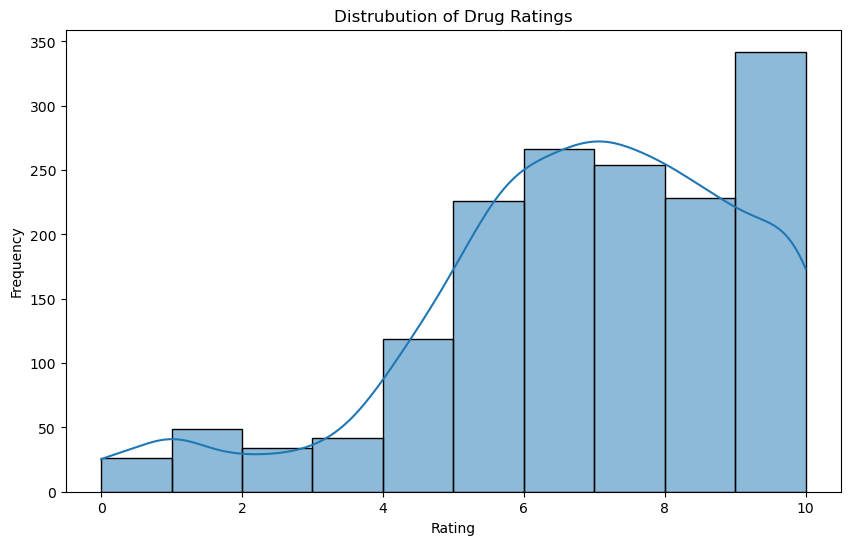

In [33]:
plt.figure(figsize = (10,6))
sns.histplot(df['rating'],bins=10 , kde=True)
plt.title('Distrubution of Drug Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()



In [47]:
Top_Drugs = df.groupby('medical_condition')['drug_name'].value_counts().nlargest(10)
print(Top_Drugs)

medical_condition  drug_name     
Acne               minocycline       2
Eczema             fluocinolone      2
Herpes             acyclovir         2
ADHD               Adderall          1
                   Adderall XR       1
                   Adhansia XR       1
                   Adzenys ER        1
                   Adzenys XR-ODT    1
                   Aptensio XR       1
                   Azstarys          1
Name: count, dtype: int64


In [61]:
side_effects = df['side_effects'].value_counts().head(10)
print(side_effects)

side_effects
hives ; difficult breathing; swelling of your face, lips, tongue, or throat. This medicine may cause serious side effects. Stop using this medicine and call your doctor at once if you have: redness or swelling of the treated area; increased pain; or severe burning or skin irritation such as a rash, itching, pain, or blistering. Less serious side effects may be more likely, and you may have none at all.                                                                                                                                                                                           10
hives ; difficult breathing; swelling of your face, lips, tongue, or throat. This medicine may cause serious side effects. Stop using this medicine and call your doctor at once if you have: bone pain, muscle weakness; confusion, changes in your mental state, seizure (convulsions); or pale skin, feeling light-headed or short of breath, rapid heart rate. Less serious side effects may be more

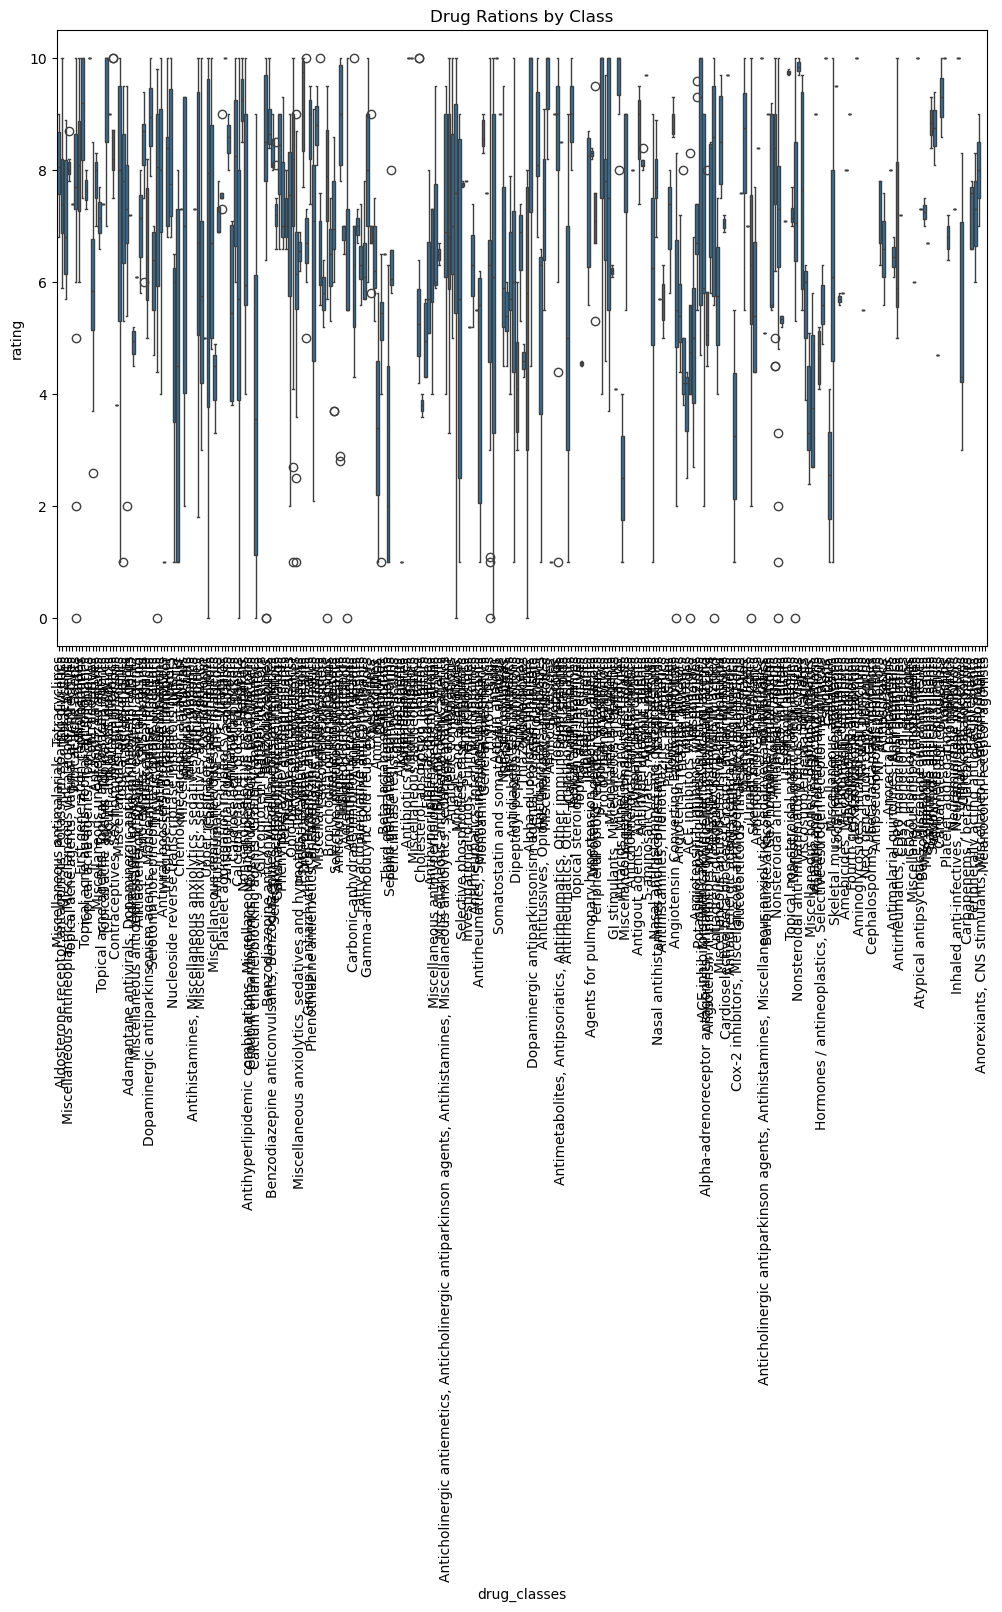

In [69]:
plt.figure(figsize = (12,8))
sns.boxplot(x = 'drug_classes', y = 'rating',data=df)
plt.xticks(rotation=90)
plt.title('Drug Rations by Class')
plt.show()

